# UTSA - CS 5243 - Computer Vision: Assignment-1

**Mao - Christopher - zbq615**






## Learning Objectives


*   Refresh / Learn basic Python Programming for use with images / videos and computer vision applications using Google Colab. Following are some resources -
  *   https://cs231n.github.io/python-numpy-tutorial - Python NumPy Tutorial from Stanford. Please go through the Google Colab part.
  *   https://www.datacamp.com/tutorial/tutorial-google-colab-for-data-scientists - Google Colab Tutorial.
  *   https://stackabuse.com/numpy-tutorial-a-simple-example-based-guide - NumPy Tutorial.







# Code / Data / Notebook Setup (10 points)

* imports, drive mounting, directory setup, output formatting as requested, submission of completed .ipynb
* All future assignments will assume you know how to do this basic setup and if not followed, your assignment will not be graded at all and you will receive a 0 (zero) instead.

In [ ]:
# Add only your imports here
import os
import cv2
import matplotlib.pyplot as plt
from moviepy.editor import *

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Computer Vision/Data"

# Image Reading and Plotting (15 points)

* Go through the basePath mentioned above, read all the 4 input images provided with the assignment (you will need to manually copy them to the above basePath data folder)
* Plot all the images in a 2x2 grid using matplotlib


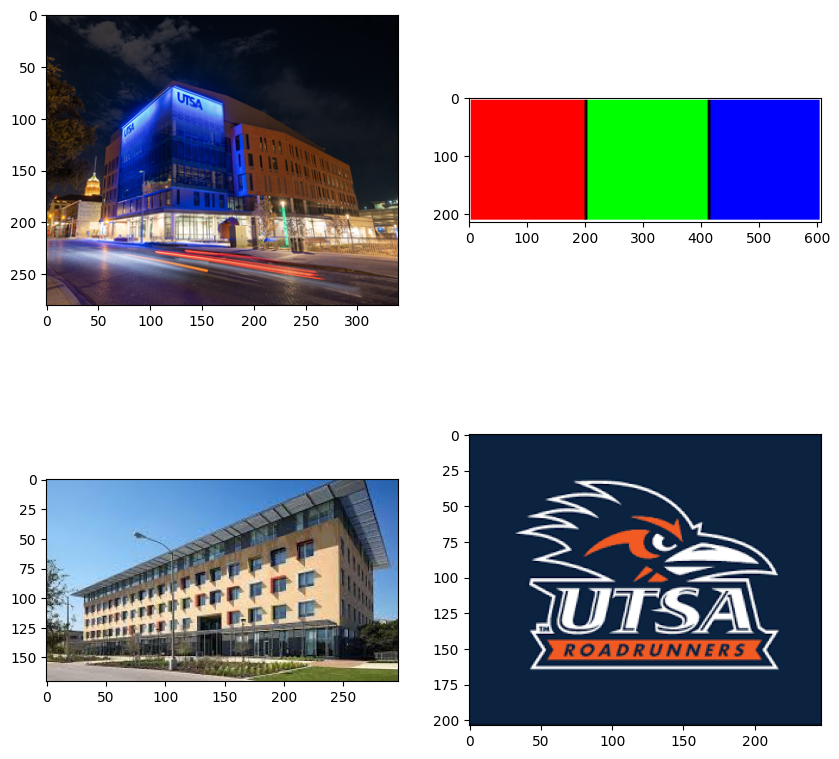

In [ ]:
# Get the list of image files in the Data folder
image_files = [f for f in os.listdir(basePath) if f.endswith('.png')]

# Read the images
images = []
for file in image_files:
  image_path = os.path.join(basePath, file)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)

# Display the images on a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(len(images)):
  row = i // 2
  col = i % 2
  axes[row, col].imshow(images[i])
plt.show()


# Turning Channels On/Off (15 points)

* Turn the individual R/G/B channels On/Off.
* Each RGB inptut image will generate 3 different RGB output images - one each with either R/G/B turned On/Off.
* Plot the final output as a grid of 4 rows x 4 columns
* The output column order must be as
  1.   original RGB image
  2.   output RGB image with Red ON and others OFF
  3.   output RGB image with Green ON and others OFF
  4.   output RGB image with Blue ON and others OFF



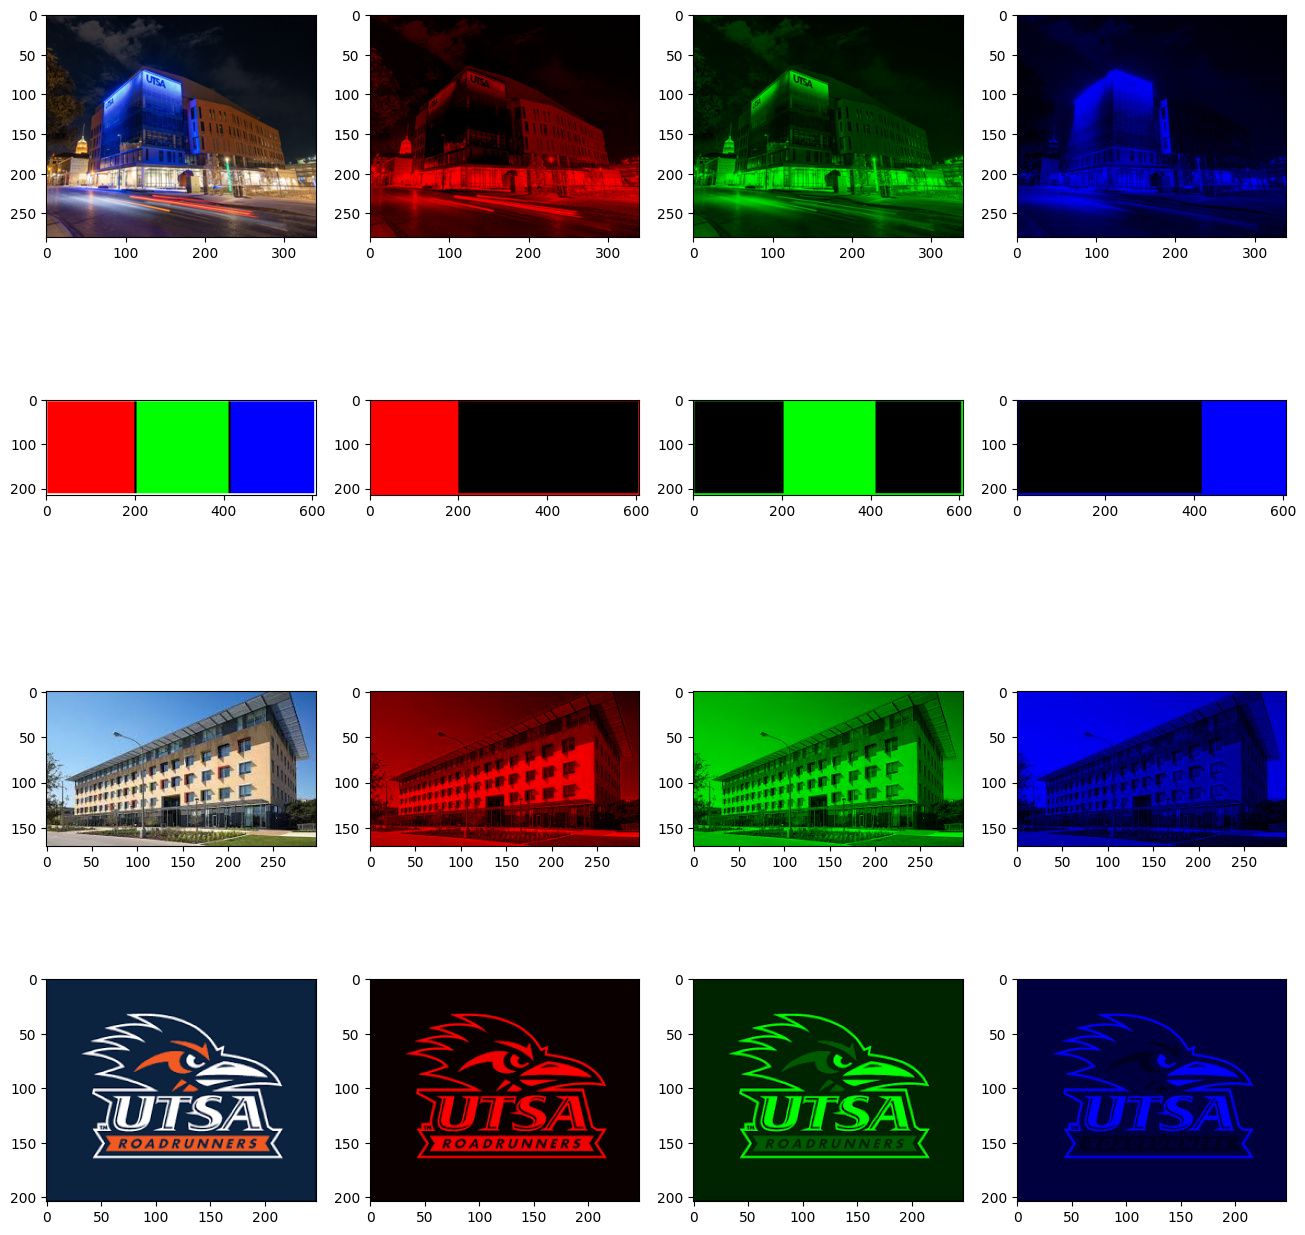

In [ ]:
# Create a list to store the modified images
modified_images = []

# Iterate through the images
for img in images:
  # Original image
  modified_images.append(img)

  # Red ON
  red_on = img.copy()
  red_on[:, :, 1] = 0  # Green OFF
  red_on[:, :, 2] = 0  # Blue OFF
  modified_images.append(red_on)

  # Green ON
  green_on = img.copy()
  green_on[:, :, 0] = 0  # Red OFF
  green_on[:, :, 2] = 0  # Blue OFF
  modified_images.append(green_on)

  # Blue ON
  blue_on = img.copy()
  blue_on[:, :, 0] = 0  # Red OFF
  blue_on[:, :, 1] = 0  # Green OFF
  modified_images.append(blue_on)

# Display the modified images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i in range(len(modified_images)):
  row = i // 4
  col = i % 4
  axes[row, col].imshow(modified_images[i])
plt.show()


# Splitting Individual R,G,B Channels (15 points)

* Split each image into the corresponding 3 individual R,G,B channels.
* Each RGB inptut image will generate 3 different Grayscale split channel images.
* Plot the final output as a grid of 4 rows x 4 columns
* The output column order must be as
  1.   original RGB image
  2.   output Grayscale image for the RED channel
  3.   output Grayscale image for the GREEN channel
  4.   output Grayscale image for the BLUE channel


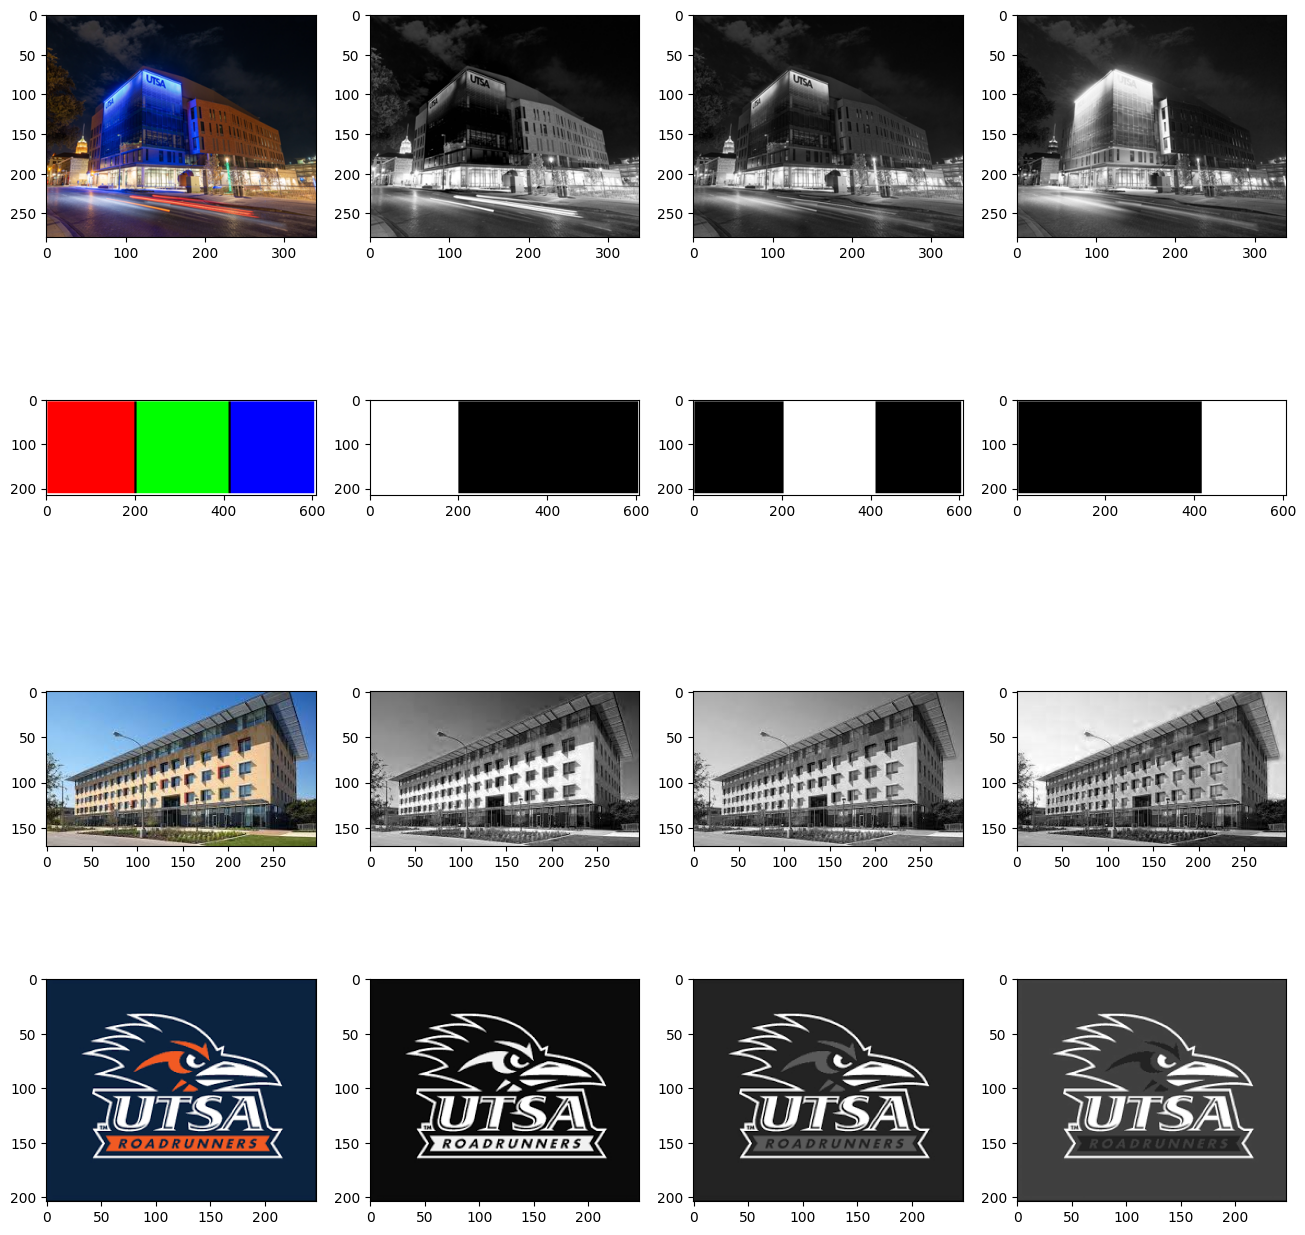

In [ ]:
# Split the images into individual channels
split_images = []

for img in images:
  # Original image
  split_images.append(img)

  # Split into R, G, B channels
  r, g, b = cv2.split(img)

  # Convert to grayscale
  split_images.append(cv2.cvtColor(r, cv2.COLOR_GRAY2RGB))
  split_images.append(cv2.cvtColor(g, cv2.COLOR_GRAY2RGB))
  split_images.append(cv2.cvtColor(b, cv2.COLOR_GRAY2RGB))

# Display the split images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i in range(len(split_images)):
  row = i // 4
  col = i % 4
  axes[row, col].imshow(split_images[i])
plt.show()


# Splitting Individual H,S,V Channels (5 points)

* Convert each input RGB image to the HSV color space.
* Split each image into the corresponding 3 individual R,G,B channels.
* Each RGB inptut image will generate 3 different Grayscale split channel images.
* Plot the final output as a grid of 4 rows x 4 columns
* The output column order must be as
  1.   original RGB image
  2.   output Grayscale image for the HUE channel
  3.   output Grayscale image for the SATURATION channel
  4.   output Grayscale image for the VALUE channel

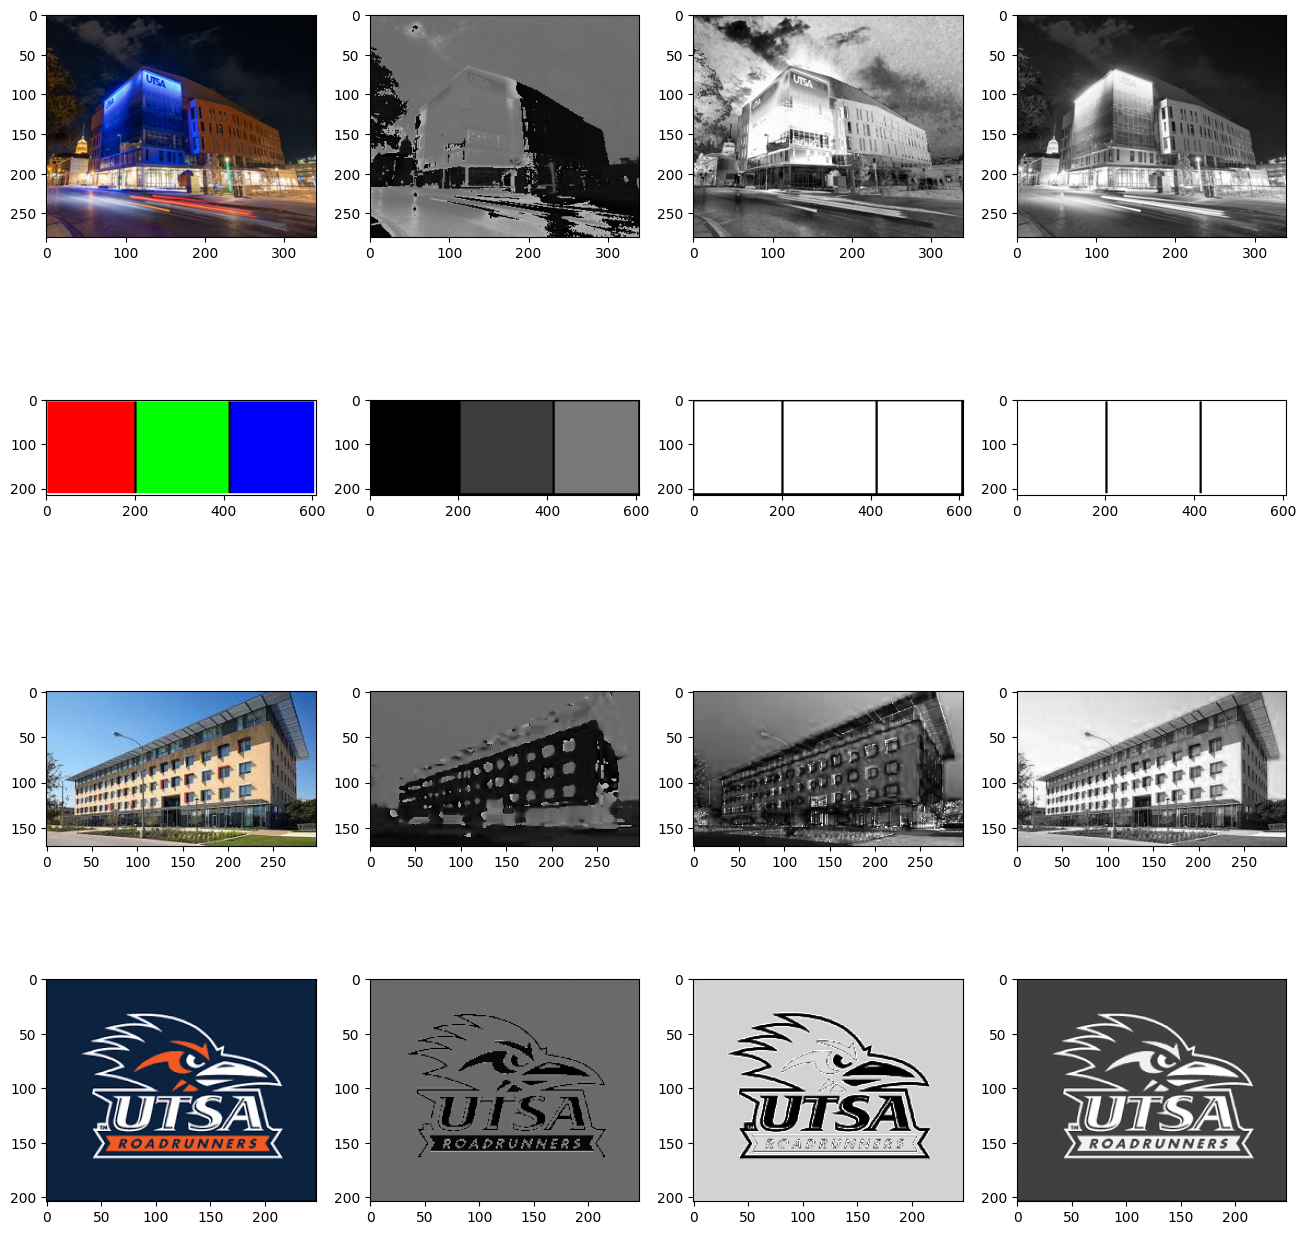

In [ ]:
# Split the images into individual channels
split_images = []

for img in images:
  # Original image
  split_images.append(img)

  # Convert from RGB to HSV
  hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

  # Split into H, S, V channels
  h, s, v = cv2.split(hsv_image)

  # Convert to grayscale
  split_images.append(cv2.cvtColor(h, cv2.COLOR_GRAY2RGB))
  split_images.append(cv2.cvtColor(s, cv2.COLOR_GRAY2RGB))
  split_images.append(cv2.cvtColor(v, cv2.COLOR_GRAY2RGB))

# Display the split images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i in range(len(split_images)):
  row = i // 4
  col = i % 4
  axes[row, col].imshow(split_images[i])
plt.show()

# Video Operations (15 points)

* Read the provided video from the "Data" folder (you will need to first upload it manually)
* Write code / function to read the video from drive and show it as output (hint: need special JS code to play video on Colab).
* Write code / function to take an input video, go through the entire video frame-by-frame, remove the "Red" color from each frame, write the result frame back as a different video with the name "(original-file-name)_edited.mp4"
* Use the above code to read the result video and play it as output.

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# https://stackoverflow.com/questions/57377185/how-play-mp4-video-in-google-colab
def show_video(video_path):
  """
  Plays a video file in Colab.

  Args:
    video_path: Path to the video file.
  """
  mp4 = open(video_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video controls>
      <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

video_path = basePath + "/ar_source.mp4"
show_video(video_path)

In [ ]:
def remove_red_from_video(video_path, output_path):
  """
  Reads a video, removes the red color from each frame, and writes the result to a new video file.

  Args:
    video_path: Path to the input video file.
    output_path: Path to the output video file.
  """
  video = cv2.VideoCapture(video_path)
  print(video)
  # Get video properties
  frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
  frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
  fps = video.get(cv2.CAP_PROP_FPS)
  print(frame_width, frame_height, fps)

  # Define the codec and create VideoWriter object
  fourcc = cv2.VideoWriter_fourcc(*'mp4v')
  # https://stackoverflow.com/questions/57420769/how-to-fix-some-number-bytes-wanted-0-bytes-read-error-on-moviepy-vfx
  temp_path = output_path.replace(".mp4", "_temp.mp4")
  out = cv2.VideoWriter(temp_path, fourcc, fps, (frame_width, frame_height))

  while(video.isOpened()):
    ret, frame = video.read()
    if not ret:
      break

    # Remove red color
    frame[:, :, 2] = 0  # Set the red channel to 0

    # Write the frame to the output video
    out.write(frame)

  # Release resources
  video.release()
  out.release()
  cv2.destroyAllWindows()

  audio = AudioFileClip(video_path)
  video = VideoFileClip(temp_path).without_audio()
  # combine.audio = video.set_audio(audio)
  combine = video.set_audio(audio)
  combine.write_videofile(output_path)


In [ ]:
# Show video with red removed
output_path = basePath + "/ar_source_edited.mp4"
remove_red_from_video(video_path, output_path)
show_video(output_path)

< cv2.VideoCapture 0x78c04e1f01d0>
640 360 25.0
Moviepy - Building video /content/drive/My Drive/Colab Notebooks/Computer Vision/Data/ar_source_edited.mp4.
MoviePy - Writing audio in ar_source_editedTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/My Drive/Colab Notebooks/Computer Vision/Data/ar_source_edited.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/Colab Notebooks/Computer Vision/Data/ar_source_edited.mp4


#Submission Instructions



1.   Complete all tasks above
2.   Export this notebook as .ipynb
      (File > Download > Download .ipynb)
3.   Upload the completed .ipynb file + output video on Canvas



## Rubric

*   (10 points) Code / Data / Notebook Setup
*   (15 points) Image Reading and Plotting
*   (15 points) Turning Channels On/Off
*   (15 points) Splitting Individual R,G,B Channels
*   (05 points) Splitting Individual H,S,V Channels
*   (15 points) Video Operations